## 一、算法集成方法

### &nbsp;&nbsp;&nbsp; &nbsp;1.装袋（Bagging）：通过给定组合投票的方式，获得最优解。比如你生病了，去n个医院看了n个医生，每个医生给你开了药方，最后的结果中，哪个药方的出现的次数多，那就说明这个药方就越有可能性是最由解，这个很好理解。而bagging算法就是这个思想。


### &nbsp;&nbsp;&nbsp; &nbsp;2.提升（Boosting）：一种用来提高弱分类算法准确度的方法,这种方法通过构造一个预测函数系列,然后以一定的方式将他们组合成一个预测函数。

### &nbsp;&nbsp;&nbsp; &nbsp;3.投票（Voting）：两个或多个算法模型，利用投票算法包装起来，计算各子模型平均预测情况

## 二、装袋算法

### &nbsp;&nbsp;&nbsp; &nbsp;1.装袋决策树

#### &nbsp;&nbsp;&nbsp; &nbsp;在数据具有很大方差的情况下，非常有效

### &nbsp;&nbsp;&nbsp; &nbsp;2.随机森林

### &nbsp;&nbsp;&nbsp; &nbsp;是用随机的方式建立一个森林，森林里面有很多的决策树组成，随机森林的每一棵决策树之间是没有关联的。在得到森林之后，当有一个新的输入样本进入的时候，就让森林中的每一棵决策树分别进行一下判断，看看这个样本应该属于哪一类，然后看看哪一类被选择最多，就预测这个样本为那一类。

### &nbsp;&nbsp;&nbsp; &nbsp;3.极端随机决策树

## 三、提升算法

### &nbsp;&nbsp;&nbsp; &nbsp;1.AdaBoost

### &nbsp;&nbsp;&nbsp; &nbsp;其核心思想是针对同一个训练集训练不同的分类器(弱分类器)，然后把这些弱分类器集合起来，构成一个更强的最终分类器(强分类器)

### &nbsp;&nbsp;&nbsp; &nbsp;2.随机梯度上升

### &nbsp;&nbsp;&nbsp; &nbsp;梯度上升法基于的思想是，要找到某个函数的最大值，最好的办法就是沿着该函数的梯度方向探寻。梯度算子总是指向函数值增长最快的方向

## 四、投票算法

## 五、测试

BFC: 0.946667 (0.071802)
ABC: 0.913333 (0.143139)
GBC: 0.940000 (0.075719)
BC: 0.946667 (0.071802)
ETC: 0.940000 (0.075719)
VC: 0.946667 (0.077746)


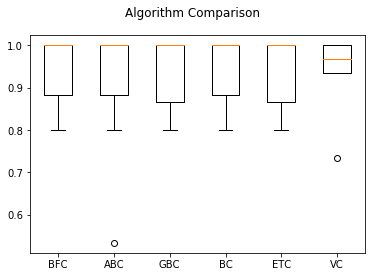

In [22]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# 导入数据
iris =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
iris.columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] 

# 将数据分为输入数据和输出结果
arrary = iris.values
# print(arrary)
X =arrary[:,0:4]

le = LabelEncoder()
le.fit(iris['Species'])   
Y = le.transform(iris['Species']) # 对花的类别进行编号处理

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
models = {}

# 装袋决策树
cart = DecisionTreeClassifier()
num_tree = 100
models['BC'] = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=seed)
# 随机森林
max_features = 3
models['BFC'] = RandomForestClassifier(n_estimators=num_tree, random_state=seed, max_features=max_features)
# 极端随机数
max_features = 3
models['ETC'] = ExtraTreesClassifier(n_estimators=num_tree, random_state=seed, max_features=max_features)
# AdaBoost
models['ABC'] = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
# 随机梯度上升
models['GBC'] = GradientBoostingClassifier(n_estimators=num_tree, random_state=seed)

# 投票算法
cart = DecisionTreeClassifier()
models2 = []
model_ld = LinearDiscriminantAnalysis()
models2.append(('ld', model_ld ))
# model_cart = DecisionTreeClassifier()
# models2.append(('cart', model_cart))
model_svc = SVC()
models2.append(('svm', model_svc))
models['VC'] = VotingClassifier(estimators=models2)

results = []
for name in models:
    result = cross_val_score(models[name], X, Y, cv=kfold)
    results.append(result)
    msg = '%s: %.6f (%.6f)' % (name, result.mean(), result.std())
    print(msg)

# 图表显示
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()


## 六、git与参考

### git ：https://coding.net/u/RuoYun/p/Python-of-machine-learning/git/tree/master

### 参考：https://read.douban.com/column/6939417/